

*   mean rating of each image
*   spearman's rank correlation - reliability: Across 25 random splits, the average reliability across all eight categories was ..., min/max category.
*   compute correlation with models (pearson rank correlations?)
*   find "outliers" to compare scores, e.g. bananas with spots, image of groups of items 
*   the role of feature complexity

In [3]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from scipy import stats

## Data reliability ##

In [4]:
path='/content/drive/MyDrive/typicality/human_rating'
banana=pd.read_csv(path+'/banana.csv')
beach=pd.read_csv(path+'/beach.csv')
car=pd.read_csv(path+'/car.csv')
church=pd.read_csv(path+'/church.csv')
lighthouse=pd.read_csv(path+'/lighthouse.csv')
mountain=pd.read_csv(path+'/mountain.csv')
mug=pd.read_csv(path+'/mug.csv')
plane=pd.read_csv(path+'/plane.csv')

Text(0.5, 1.0, 'banana')

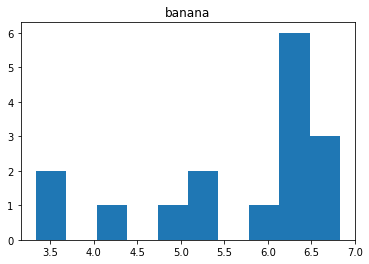

In [5]:
plt.hist(banana.mean())
plt.title('banana')

In [6]:
def compute_reliability(data):
  reliability=[]
  for i in range(25):
    b1, b2=train_test_split(data, test_size=0.5)
    b1, b2=b1.mean(), b2.mean()
    coef, p=spearmanr(b1, b2)
    reliability.append(coef)
  return np.mean(reliability)

In [7]:
res={}
data=[banana, beach, car, church, lighthouse, mountain, mug, plane]
for i, cat in enumerate(data):
  res[i]=compute_reliability(cat)

In [8]:
res

{0: 0.9012880611619434,
 1: 0.9586327451298895,
 2: 0.9405354022863933,
 3: 0.9084291071187169,
 4: 0.909183114922089,
 5: 0.9136116615497464,
 6: 0.8797511748612835,
 7: 0.9511122339242604}

In [9]:
print('min reliability: ', min(res.values()))
print('max reliability: ', max(res.values()))
print('mean reliability: ', sum(res.values())/8)

min reliability:  0.8797511748612835
max reliability:  0.9586327451298895
mean reliability:  0.9203179376192903


In [ ]:
'''
print('banana reliability: ', compute_reliability(banana))
print('beach reliability: ', compute_reliability(beach))
print('car reliability: ', compute_reliability(car))
print('church reliability: ', compute_reliability(church))
print('lighthouse reliability: ', compute_reliability(lighthouse))
print('mountain reliability: ', compute_reliability(mountain))
print('mug reliability: ', compute_reliability(mug))
print('plane reliability: ', compute_reliability(plane))
'''

banana reliability:  0.8558229443902253
beach reliability:  0.9158266432518924
car reliability:  0.9170486442344044
church reliability:  0.8204281936851217
lighthouse reliability:  0.8249010556329803
mountain reliability:  0.8285940983198994
mug reliability:  0.8756992202439241
plane reliability:  0.9419826786338891


## Correlation to models ##

Problem - different order of images in survey and model?

In [10]:
# with GoogLeNet
google_df=pd.read_csv('/content/drive/MyDrive/typicality/google_withlabel.csv')
google_df.head()

,Unnamed: 0,type,typicality_score,dir,top5_labels,7_score
0,0,Mountain,85.1,/content/drive/MyDrive/typicality/Typicality_p...,"{'volcano': 0.8511720895767212, 'promontory': ...",6.0
1,1,Mountain,67.4,/content/drive/MyDrive/typicality/Typicality_p...,"{'alp': 0.673840343952179, 'valley': 0.1376409...",4.7
2,2,Mountain,31.3,/content/drive/MyDrive/typicality/Typicality_p...,"{'alp': 0.31291672587394714, 'valley': 0.16099...",2.2
3,3,Mountain,17.2,/content/drive/MyDrive/typicality/Typicality_p...,"{'valley': 0.17231088876724243, 'alp': 0.13140...",1.2
4,4,Mountain,64.2,/content/drive/MyDrive/typicality/Typicality_p...,"{'lakeside': 0.6420929431915283, 'boathouse': ...",4.5


In [11]:
Bana=google_df[google_df['type']=='Banana']['typicality_score']
Beach=google_df[google_df['type']=='Beach']['typicality_score']
Car=google_df[google_df['type']=='Car']['typicality_score']
Church=google_df[google_df['type']=='Church']['typicality_score']
Light=google_df[google_df['type']=='Lighthouse']['typicality_score']
Mount=google_df[google_df['type']=='Mountain']['typicality_score']
Mug=google_df[google_df['type']=='Mug']['typicality_score']
Plane=google_df[google_df['type']=='Plane']['typicality_score']

bananas caused the problem

In [16]:
banana.iloc[21]

1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
Name: 21, dtype: int64

In [17]:
#bana=banana.mean()
#Bana=Bana.reset_index(drop=True, inplace=True)
corr=[]
for i in range(banana.shape[0]):
  if i!=17 and i!=21:
    bana=banana.iloc[i]
    coef, p=stats.pearsonr(bana.values, Bana.values)
    print(coef)
    #coef=np.corrcoef(bana, Bana)
    #coef, p=spearmanr(bana, Bana)
    corr.append(abs(coef))
bana_corr=np.mean(corr)
print('Banana correlation: ', bana_corr)

-0.2990236780521775
-0.3990570802634277
-0.3134289847335607
-0.26841749919436186
-0.3783728957841457
-0.34340106831151274
-0.2649020266632386
0.01744458362728718
-0.05559069632217423
-0.11087938898066843
-0.4489529988524572
0.1070645902055159
-0.3305929354917737
-0.05091407296983663
-0.40681799500350574
-0.18497203426370024
-0.2765623178612593
-0.3369317986660743
-0.266539305803667
-0.23679475544191592
-0.10574055384167583
-0.25556668255535137
-0.25556668255535137
-0.2090219273474627
-0.34138753803137967
-0.33131061804807416
-0.25556668255535137
-0.32151102972751633
-0.41157752677234566
-0.25556668255535137
-0.32868939128196517
-0.4278820353731868
-0.07896193987519967
-0.22458094848943294
Banana correlation:  0.26175267486770304


In [18]:
corr=[]
for i in range(beach.shape[0]):
  #if i!=17 and i!=21:
  bea=beach.iloc[i]
  coef, p=stats.pearsonr(bea.values, Beach.values)
  print(coef)
  #coef=np.corrcoef(bea, Beach)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
bea_corr=np.mean(corr)
print('Beach correlation: ', bea_corr)

-0.12995261167574162
0.5222888034426749
0.166560199709492
-0.09601483115216108
-0.2068474492650485
0.2627986156953933
-0.42447407711223517
-0.39935988576578385
0.3578559081295195
0.10934782296210258
-0.09941324216457817
-0.08778227636040198
0.05728726109735585
-0.048076627558831075
-0.45236750136046466
-0.19426664569360563
-0.2754718181567793
0.0199529089554335
-0.22460189718459753
-0.19572489894252276
-0.4046447020572069
-0.03562940652169533
0.18385644178436455
-0.34409185230187694
0.08331129924650668
-0.1536788193537405
0.12761065718668305
-0.1635189505703456
-0.3232359144304162
-0.09485692069310808
0.08773536765126425
0.0010041637203980353
-0.003604588618818516
-0.29151332608659775
0.00046595495170261014
-0.26066551177380454
Beach correlation:  -0.08138106528520753


In [19]:
corr=[]
for i in range(car.shape[0]):
  #if i!=17 and i!=21:
  ca=car.iloc[i]
  coef, p=stats.pearsonr(ca.values, Car.sort_index().values)
  print(coef)
  #coef=np.corrcoef(ca, Car)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
car_corr=np.mean(corr)
print('Car correlation: ', car_corr)

-0.18664140968063042
-0.3483507303909837
-0.3455008285402779
-0.1861044351301718
-0.42097290923476666
-0.4148088028589688
-0.03283271381699879
-0.4554234505080942
-0.037215290795048206
-0.23076446228738628
-0.4208404086156253
-0.3310725597148111
-0.26585248631035796
-0.4739101824244752
-0.3067252000435977
-0.23494282055134386
-0.2451336106850759
-0.242931578415104
-0.415600012867621
-0.4683095942407208
-0.22498001817556634
-0.26497228496825953
-0.21083258928588386
-0.31863179028558486
-0.2556197920919945
-0.006784104709240735
-0.20468802624319654
-0.15729714763575472
-0.1482177014102425
-0.18568086315827417
-0.40324986598089263
-0.341550960052226
-0.46493733181698504
-0.38555815524847603
-0.23719513422134741
-0.09343522246734767
Car correlation:  -0.2768767909684259


In [20]:
corr=[]
for i in range(church.shape[0]):
  #if i!=17 and i!=21:
  ch=church.iloc[i]
  coef, p=stats.pearsonr(ch.values, Church.values)
  print(coef)
  #coef=np.corrcoef(ch, Church)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
church_corr=np.mean(corr)
print('Church correlation: ', church_corr)

0.1391760271341022
0.28916223123166046
-0.0724403746209522
0.662090254714628
0.10949958894094608
0.22738167824448147
0.07097589444633648
-0.00604126630164048
-0.15719320182353982
0.2763016192062508
0.08684129142219885
-0.08530270269402065
0.46429974488908354
0.41912484343736933
0.16348273763032659
0.3532536714558835
-0.12379121086630754
0.10861339990676899
0.39427928554855907
0.30950118014279215
0.37347114595776265
0.3765525423531404
-0.2039303013061427
0.13239817060827397
0.29942139822964503
0.24050155682607874
-0.005282736805167165
-0.06365966145422075
0.34827896127790436
0.42722203086933497
0.2915523517564373
0.35747417363105616
0.29196815424359474
0.2551963708616727
0.21588813470471147
0.25346186834679807
Church correlation:  0.20054802367071686


In [21]:
corr=[]
for i in range(lighthouse.shape[0]):
  #if i!=17 and i!=21:
  li=lighthouse.iloc[i]
  coef, p=stats.pearsonr(li.values, Light.values)
  print(coef)
  #coef=np.corrcoef(li, Light)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
light_corr=np.mean(corr)
print('Lighthouse correlation: ', light_corr)

0.20762485964479915
-0.10758672789182751
0.22920517049136677
-0.08426887911283315
0.22228280934334424
0.3297874722141516
-0.20304265602368576
0.32931432352969925
0.2780230283229969
0.1112455576884038
-0.20858436741527936
-0.040679611428953114
0.0098518276009434
0.16794889990023604
-0.1627200005612933
0.17140204064794773
-0.44186963368233695
0.28991603392724136
0.2977428226427572
-0.20024306903101924
0.4312361738516201
-0.1843663141729227
-0.19097370747200942
-0.09474947800506843
-0.037259513920874954
0.18063149460535
-0.16234285817373975
0.10677368542706261
0.29617615449974966
0.2911860810679203
-0.14176327792305715
-0.07072459616771537
0.357196490479639
0.31850760813313167
0.23839178057186833
0.18129039735286306
Lighthouse correlation:  0.07540444502667991


In [29]:
mountain.iloc[31]

1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
Name: 31, dtype: int64

In [30]:
corr=[]
for i in range(mountain.shape[0]):
  if i!=31:
    mount=mountain.iloc[i]
    coef, p=stats.pearsonr(mount.values, Mount.values)
    print(coef)
  #coef=np.corrcoef(mount, Mount)
    #coef, p=spearmanr(bana, Bana)
    corr.append(coef)
mount_corr=np.mean(corr)
print('Mountain correlation: ', mount_corr)

-0.15626465740724638
-0.038127742887033356
0.33956160027320015
0.046520245422140526
-0.013394253660560344
0.2636424005908616
0.1647692538848452
-0.06557943745645806
-0.07997495845284802
-0.255257560228515
0.022232601893311915
-0.0013935981614604936
0.16496883301866772
0.3129039280700262
0.32359409009008144
0.11975479107426105
0.3613252952070112
0.19210660786224562
0.17502513394567976
0.11225302990346563
0.18875621408528337
0.16496883301866774
0.16496883301866774
0.29193331494101676
0.16496883301866772
0.13860174464842034
0.07467650606025152
0.10250171060034285
0.46908605912054463
0.35907115716199645
0.45919457429436994
0.2710657805708978
0.4369412710849786
-0.0505179939735446
0.01164420287324934
Mountain correlation:  0.14961504695729963


In [31]:
corr=[]
for i in range(mug.shape[0]):
  #if i!=17 and i!=21:
  m=mug.iloc[i]
  coef, p=stats.pearsonr(m.values, Mug.values)
  print(coef)
  #coef=np.corrcoef(m, Mug)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
mug_corr=np.mean(corr)
print('Mug correlation: ', mug_corr)

-0.20839012738171037
-0.20940772678803632
-0.4001088192741641
-0.18830781926986745
-0.22968542489808513
-0.46965130007561606
0.08631470831102489
-0.0735402340378638
0.04711461151695204
-0.17490708890582143
0.30533008854476185
-0.41740023855604674
-0.4298592786870727
-0.3189322402000071
-0.12601278006173597
-0.05719750852079415
-0.22124354741094787
-0.06807954566216692
-0.10940864893685395
0.2850867957559447
-0.12506907042553989
-0.2711034304216773
-0.28140596577818316
-0.26392997609210367
-0.10691448220933489
-0.002500038400848878
-0.6085595006708838
0.0794655431274032
-0.062567379078919
-0.3276719268087458
-0.10582016737364708
-0.29103008389233065
-0.06043185309884462
-0.4205341139642688
-0.08379115010179362
-0.015867680539904394
Mug correlation:  -0.16461159445188137


In [32]:
corr=[]
for i in range(plane.shape[0]):
  #if i!=17 and i!=21:
  pla=plane.iloc[i]
  coef, p=stats.pearsonr(pla.values, Plane.values)
  print(coef)
  #coef=np.corrcoef(pla, Plane)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
plane_corr=np.mean(corr)
print('Plane correlation: ', plane_corr)

0.07037642580457076
-0.06485825651484203
0.037563601109056745
0.12156062678793081
0.12409900810843924
-0.040002053568735874
0.09865331398713159
0.1992703850019404
0.595721853445675
0.24911597811387498
0.24069205139178795
0.0667585684143435
-0.014089917807583285
-0.07138377483938468
-0.13088302843462732
0.4502448104151789
0.08631853713017844
0.02311724950169397
-0.04613949564213271
0.17898606443031984
-0.011060258491688235
-0.18629115884737177
-0.04105644164069919
0.10368420775458437
0.02109028836388256
-0.20055038008026355
-0.05698020171629742
-0.2618190989152588
0.08885411898896209
0.10723446327470015
-0.2432740239182729
-0.15919214521680103
-0.012726108007669615
0.1288348266305322
0.01808479847224112
0.0862810345230238
Plane correlation:  0.04322877411134499


In [ ]:
'''
sum_corr=bana_corr+bea_corr+car_corr+church_corr+mount_corr+mug_corr+plane_corr+light_corr
avg_corr=sum_corr/8
avg_corr
'''

0.17901414851876382